In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# מוסיף את נתיב utils לרשימת הנתיבים
sys.path.append(os.path.abspath("../utils"))

In [3]:
from skeleton_utils import plot_skeleton

In [4]:
data_path = "../data/NTU60_CS.npz"


In [5]:

# טוענים את הדאטה
data = np.load(data_path, allow_pickle=True)
print("Keys in the npz:", data.files)


Keys in the npz: ['x_train', 'y_train', 'x_test', 'y_test']


In [6]:
# נניח שיש שם X ו־y
X = data['x_train']  # הסקלטון
y = data['y_train']  # התוויות

print("X shape:", X.shape)  # אמור להיות (samples, frames, joints, 3)
print("y shape:", y.shape)


X shape: (40091, 300, 150)
y shape: (40091, 60)


In [7]:
# נסתכל על שלד ראשון בפריים ראשון
sample = X[0]
print("Sample shape:", sample.shape)


Sample shape: (300, 150)


In [8]:
print(sample.action_class)

AttributeError: 'numpy.ndarray' object has no attribute 'action_class'

In [ ]:
# flatten של פריים ראשון
flat_frame = sample[0].flatten()


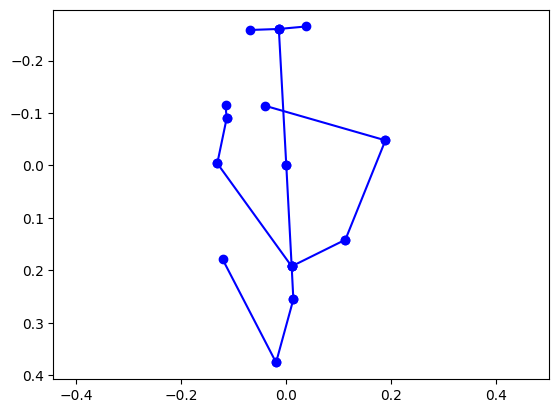

<Figure size 640x480 with 0 Axes>

In [ ]:
# ציור
plot_skeleton(flat_frame)

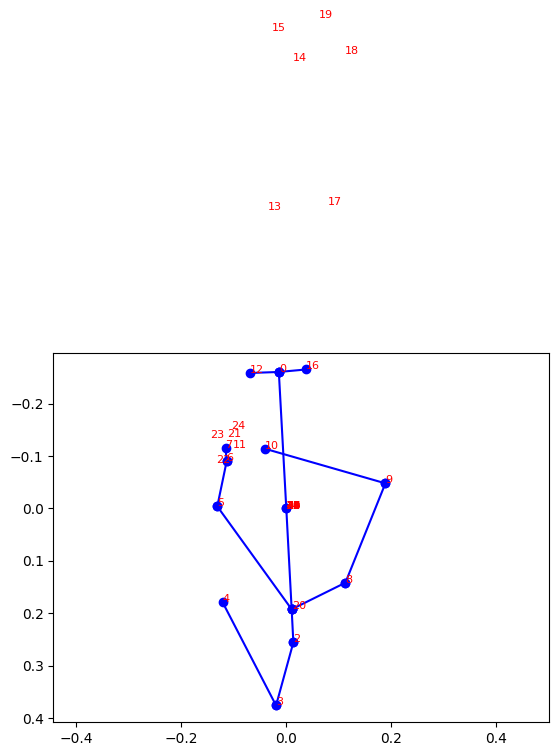

In [ ]:
from skeleton_utils import parse_frame, plot_skeleton
connections = [
    (0, 1), (1, 20), (20, 2), (2, 3), (3, 4),
    (20, 8), (8, 9), (9, 10),
    (20, 5), (5, 6), (6, 7),
    (0, 16), (0, 12)
]

# ניקח דגימה ראשונה, פריים ראשון
flat_frame = X[0][0]  # זה כבר באורך 150

# ממירים לרשימה של 50 מפרקים
frame = parse_frame(flat_frame)  # תוצאה: list of 50 × [x,y,z]

# מציירים את השלד עם מספרים
import matplotlib.pyplot as plt

for (i, j) in connections:
    if i >= len(frame) or j >= len(frame):
        continue
    x = [frame[i][0], frame[j][0]]
    y = [frame[i][1], frame[j][1]]
    plt.plot(x, y, 'bo-')

for idx, joint in enumerate(frame):
    plt.text(joint[0], joint[1], str(idx), fontsize=8, color='red')

plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()


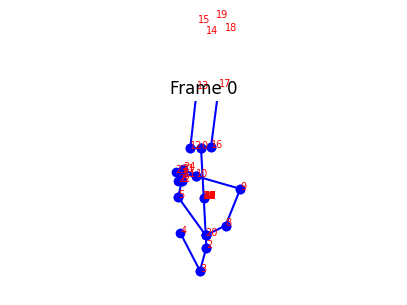

In [ ]:
import matplotlib.pyplot as plt
from skeleton_utils import parse_frame
import time

# דגימה לצפייה
sample_index = 0
sample = X[sample_index]

# חיבורים בין מפרקים
connections = [
    (0, 1), (1, 20), (20, 2), (2, 3), (3, 4),
    (20, 8), (8, 9), (9, 10), (10, 23), (10, 24),
    (20, 5), (5, 6), (6, 7), (7, 21), (7, 22),
    (0, 12), (12, 13), (13, 14), (14, 15),
    (0, 16), (16, 17), (17, 18), (18, 19)
]

# יצירת הפיגורה רק פעם אחת
fig, ax = plt.subplots(figsize=(5, 5))

for frame_index in range(len(sample)):
    flat_frame = sample[frame_index]
    frame = parse_frame(flat_frame)

    ax.clear()

    # ציור העצמות
    for (i, j) in connections:
        if i >= len(frame) or j >= len(frame):
            continue
        x = [frame[i][0], frame[j][0]]
        y = [frame[i][1], frame[j][1]]
        ax.plot(x, y, 'bo-')

    # מספרים על המפרקים
    for idx, joint in enumerate(frame):
        ax.text(joint[0], joint[1], str(idx), fontsize=7, color='red')

    ax.set_title(f"Frame {frame_index}")
    ax.set_xlim(-1, 1)
    ax.set_ylim(0.5, -0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.pause(0.02)
